In [ ]:
#iris

## LinearSVC 훈련

In [ ]:
from sklearn import datasets

iris =datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) # setosa와 versicolor만 가지고 분류
X = X[setosa_or_versicolor] # setosa와 versicolor 클래스에 속하는 꽃잎 넓이와 길이 출력
y = y[setosa_or_versicolor] # setosa는 False로, versicolor는 True로 출력

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

C = 5
alpha = 1 / (C * len(X)) # SGDClassifier을 사용하기 위해 필요한 파라미터

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha, max_iter=1000, tol=1e-3, random_state=42) #eta0과 tol은 SGDClassifier을 위해 필요한 파라미터로 SVM 수식에 나오지만 이해하지 못해 패스

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC: ", lin_clf.intercept_, lin_clf.coef_)
print("SVC: ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}): ".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:  [0.28474272] [[1.05364736 1.09903308]]
SVC:  [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200):  [0.117] [[0.77714169 0.72981762]]


### lin_clf.coef[0, 0] = w0
### lin_clf.coef_[0, 1] = w1
### lin_clf.intercept_ = b
### 결정함수 식: w0x0 + w1x1 + b

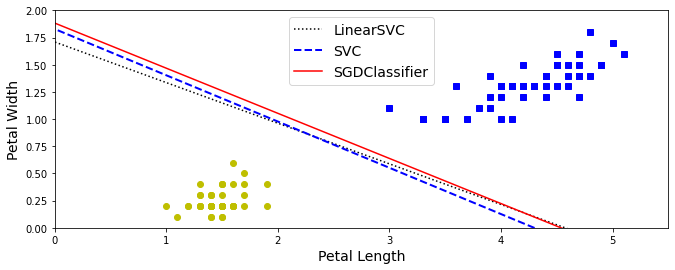

In [ ]:
# 여기서 w1, w2, w3은 기울기 / b1, b2, b3은 절편 표시(위에 표현한 w, b와 헷갈리지 말기)
# -w0/w1, -b/w1 -> 음수인 이유는 결정함수 w0x0 + w1x1 + b 가 0보다 크냐, 작냐를 기준으로 클래스를 나누기 때문
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 결정 경계를 원본 스케일로 변환
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])


import matplotlib.pyplot as plt
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # versicolor
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # setosa
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

## scaler.inverse_transform 알아보기

In [ ]:
import numpy as np

test1 = np.array([
                  [1, 1000],
                  [10, 10000],
                  [100, 100000],
               ])

scaler = StandardScaler() # MinMaxScaler()도 시도해보기
scaled = scaler.fit_transform(test1)
print(scaled)

original = scaler.inverse_transform(scaled)
print(original) # 원래 test1 데이터와 같아진 것을 확인

[[-0.80538727 -0.80538727]
 [-0.60404045 -0.60404045]
 [ 1.40942772  1.40942772]]
[[1.e+00 1.e+03]
 [1.e+01 1.e+04]
 [1.e+02 1.e+05]]


# MNIST 데이터셋에 SVM 분류기 훈련
### - SVM은 이진 분류기라 OvA 전략을 사용해 10개의 숫자를 분류해야 함

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

# 총 7만 개의 샘플 존재
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [ ]:
# 선형 SVM 분류기는 자동으로 OvA(or OvR) 전략을 사용하므로 특별히 처리할 필요 없음
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8733

In [ ]:
# 정확도를 높이기 위한 스케일링 추가
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float32))

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [ ]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9226833333333333

In [ ]:
# 가우시안 RBF 커널 사용
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

In [ ]:
# 교차 검증을 사용한 랜덤 서치로 하이퍼파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=10.675415958105964, gamma=0.004254064622805893 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . C=10.675415958105964, gamma=0.004254064622805893, total=   1.2s
[CV] C=10.675415958105964, gamma=0.004254064622805893 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] . C=10.675415958105964, gamma=0.004254064622805893, total=   1.2s
[CV] C=10.675415958105964, gamma=0.004254064622805893 ................
[CV] . C=10.675415958105964, gamma=0.004254064622805893, total=   1.2s
[CV] C=8.33759344602608, gamma=0.001083098955988614 ..................
[CV] ... C=8.33759344602608, gamma=0.001083098955988614, total=   0.9s
[CV] C=8.33759344602608, gamma=0.001083098955988614 ..................
[CV] ... C=8.33759344602608, gamma=0.001083098955988614, total=   0.9s
[CV] C=8.33759344602608, gamma=0.001083098955988614 ..................
[CV] ... C=8.33759344602608, gamma=0.001083098955988614, total=   0.9s
[CV] C=3.131893694004945, gamma=0.013377634272989561 .................
[CV] .. C=3.131893694004945, gamma=0.013377634272989561, total=   1.3s
[CV] C=3.131893694004945, gamma=0.013377634272989561 .................
[CV] .. C=3.131893694004945, gamma=0.013377634272989561, total=   1.3s
[CV] C=3.131893694004945, gamma=0.013377634272989561 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   35.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0136700ac8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0136700898>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

# 참고
## 1. reciprocal 함수(=loguniform)
### - reciprocal 함수는 a와 b를 인자로 가져 표준화된 형태의 확률 밀도 함수 생성
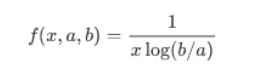
#### 참고: https://dsbook.tistory.com/109

## 2. uniform 함수
### - 균등 분포 확률 밀도 함수

In [ ]:
rnd_search_cv.best_estimator_

SVC(C=8.33759344602608, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.001083098955988614, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
rnd_search_cv.best_score_

0.8629917342492193

In [ ]:
# 전체 데이터셋으로 최선의 모델을 재훈련(많은 시간 소요 주의!!!)
# rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)
# y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
# accuracy_score(y_train, y_pred)

# 실제 테스트셋으로 모델 테스트
# y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
# accuracy_score(y_train, y_pred)

# 캘리포니아 주택 가격 데이터셋에 SVM 회귀 훈련

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # 테스트셋에는 fit를 제외한 transform만 하기!! 
# 학습 데이터를 기반으로 스케일링 기본 설정(max, min 값 등)을 한 뒤, 이를 테스트 데이터에도 그대로 적용해야 한다. 즉 학습 데이터 분포를 바탕으로 이미 스케일링 설정이 완료되었기 때문에 예측할 때
# 데이터 분포가 달라 성능이 떨어지는 일을 방지하는 것이다. 

In [ ]:
# 먼저 간단한 LinearSVR 훈련시켜보기 
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_trained_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_trained_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.949968822217229

In [ ]:
# RMSE 확인
np.sqrt(mse)

0.9746634404845752

In [ ]:
# RBG 커널을 사용
# 하이퍼파라미터 C와 gamma의 적절한 값을 찾기 위해 교차 검증을 사용한 랜덤 서치 적용
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_trained_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.4s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.3s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.5s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.7s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.5s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.7s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   8.7s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   8.9s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0135f14358>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0135f14128>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_trained_scaled)
mse = mean_squared_error(y_pred, y_train)
np.sqrt(mse)

0.5727524770785356

In [ ]:
# 테스트셋을 통해 모델 성능 테스트
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.592916838552874